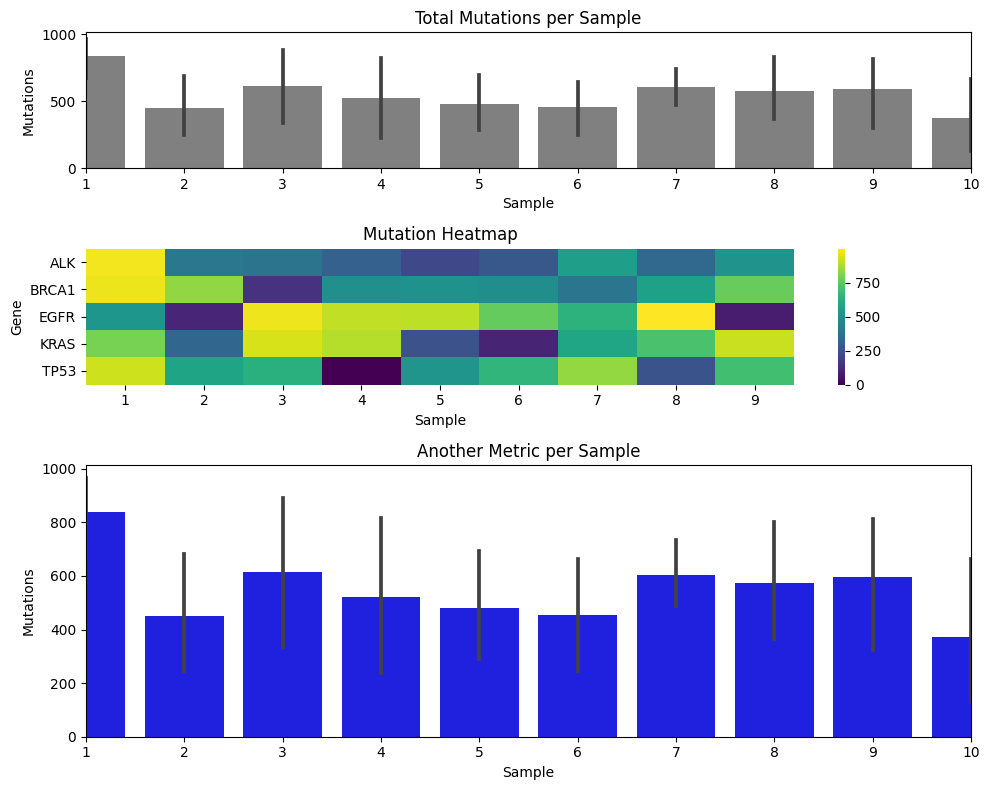

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = pd.DataFrame({
    'Sample': np.repeat(np.arange(1, 11), 5),
    'Gene': np.tile(['TP53', 'KRAS', 'EGFR', 'BRCA1', 'ALK'], 10),
    'Mutations': np.random.randint(0, 1000, 50)
})

# Set up a figure with subplots
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(3, 1, height_ratios=[1, 1, 2])

# Top bar plot
ax0 = fig.add_subplot(gs[0, 0])
sns.barplot(x='Sample', y='Mutations', data=data, ax=ax0, color='gray')
ax0.set_title('Total Mutations per Sample')

# Middle heatmap
ax1 = fig.add_subplot(gs[1, 0])
heatmap_data = pd.pivot_table(data, values='Mutations', index='Gene', columns='Sample', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', ax=ax1)
ax1.set_title('Mutation Heatmap')

# Bottom bar plot
ax2 = fig.add_subplot(gs[2, 0])
sns.barplot(x='Sample', y='Mutations', data=data, ax=ax2, color='blue')
ax2.set_title('Another Metric per Sample')

# Align axes manually
for ax in [ax0, ax1, ax2]:
    ax.set_xlim(0, len(data['Sample'].unique()) - 1)

plt.tight_layout()
plt.show()
